In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Get our traning and test data
train = pd.read_csv('sign/sign_mnist_train.csv')
test = pd.read_csv('sign/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#Get our traning labels
labels = train['label'].values

In [9]:
#view the unique labels 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [10]:
labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

<Axes: ylabel='count'>

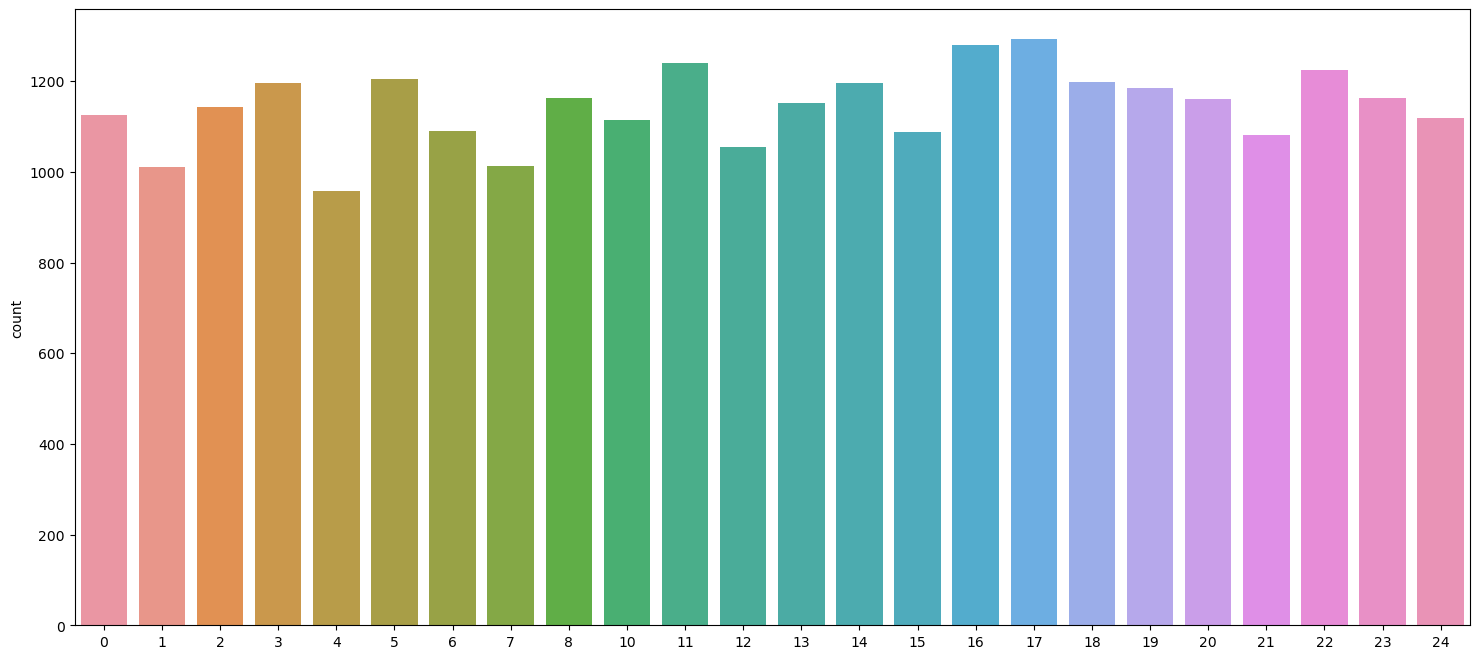

In [11]:
#plot quantities of each class
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [12]:
train.drop(columns = 'label', inplace= True,axis=1)

In [15]:
train.values

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [19]:
#Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
print(images)
images = np.array([i.flatten() for i in images])

[[[107 118 127 ... 170 170 169]
  [111 121 129 ... 171 171 170]
  [113 123 131 ... 171 171 171]
  ...
  [142 150 159 ... 202 201 200]
  [142 151 160 ... 204 203 202]
  [142 151 160 ... 204 203 202]]

 [[155 157 156 ... 138  92 108]
  [158 159 159 ... 142 116 143]
  [161 161 161 ... 147 125 140]
  ...
  [162 159 145 ...  91 101  94]
  [153 139 115 ...  97  95 120]
  [135 116  95 ... 103 135 149]]

 [[187 188 188 ...  66  77  83]
  [188 189 189 ...  73  73  71]
  [190 190 190 ...  74  68  61]
  ...
  [212 198 175 ... 195 193 192]
  [202 179 152 ... 195 194 193]
  [198 166 132 ... 195 194 195]]

 ...

 [[174 174 174 ... 160 158 156]
  [178 178 177 ... 162 160 158]
  [181 180 180 ... 164 162 161]
  ...
  [215 216 216 ... 201 199 198]
  [216 217 217 ... 201 200 198]
  [217 217 217 ... 202 200 200]]

 [[177 181 184 ... 181 179 177]
  [179 182 185 ... 183 181 179]
  [181 184 187 ... 185 183 182]
  ...
  [129 132 134 ...  94 102  70]
  [131 134 132 ...  78 100  86]
  [136 135 135 ...  64  87  

In [9]:
#hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

labels_binrizer = LabelBinarizer()
labels = labels_binrizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


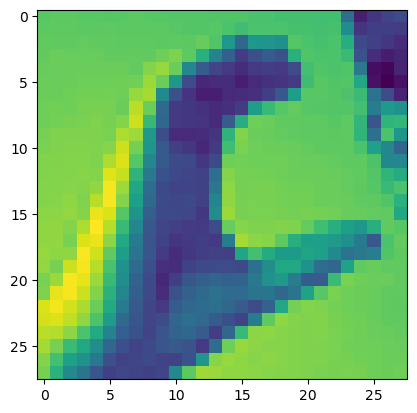

In [11]:
# Inspect on image
index =2 
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [12]:
#Use OpenCV to view 10 random images from traning data
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    
    sample =input_im.reshape(28,28).astype(np.uint8)
    sample =cv2.resize(sample,None,fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#split our data into x_train,x_test,y_train,y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.3,random_state =101)

In [14]:
#start loading our tensorflow modules and define our batch size
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs =10

In [15]:
#Scale our images images
x_train = x_train/255
x_test = x_test/255

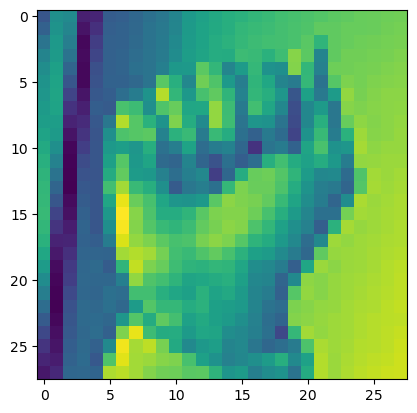

In [16]:
#Reshape them into the size required by tf and keras
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [17]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout


model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation ='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0,20))

model.add(Dense(num_classes,activation='softmax'))

In [18]:
#Compile our Model
model.compile(loss = 'categorical_crossentropy',
             optimizer= Adam(),
             metrics=['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [20]:
#train our model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 16s 100ms/step - loss: 2.6025 - accuracy: 0.2053 - val_loss: 1.7933 - val_accuracy: 0.4311
Epoch 2/10
151/151 [==============================] - 14s 94ms/step - loss: 1.3232 - accuracy: 0.5751 - val_loss: 0.9970 - val_accuracy: 0.6848
Epoch 3/10
151/151 [==============================] - 14s 95ms/step - loss: 0.7615 - accuracy: 0.7537 - val_loss: 0.6112 - val_accuracy: 0.8041
Epoch 4/10
151/151 [==============================] - 15s 101ms/step - loss: 0.4759 - accuracy: 0.8486 - val_loss: 0.4090 - val_accuracy: 0.8700
Epoch 5/10
151/151 [==============================] - 17s 112ms/step - loss: 0.3189 - accuracy: 0.9008 - val_loss: 0.3008 - val_accuracy: 0.9085
Epoch 6/10
151/151 [==============================] - 17s 112ms/step - loss: 0.2286 - accuracy: 0.9291 - val_loss: 0.1836 - val_accuracy: 0.9495
Epoch 7/10
151/151 [==============================] - 17s 115ms/step - loss: 0.1328 - accuracy: 0.9668 - val_loss: 0.1348 - val_accu

In [21]:
#save our model
model.save("sign_mnist_cnn_50_Epochs")
print("Model Saved")

INFO:tensorflow:Assets written to: sign_mnist_cnn_50_Epochs\assets


INFO:tensorflow:Assets written to: sign_mnist_cnn_50_Epochs\assets


Model Saved


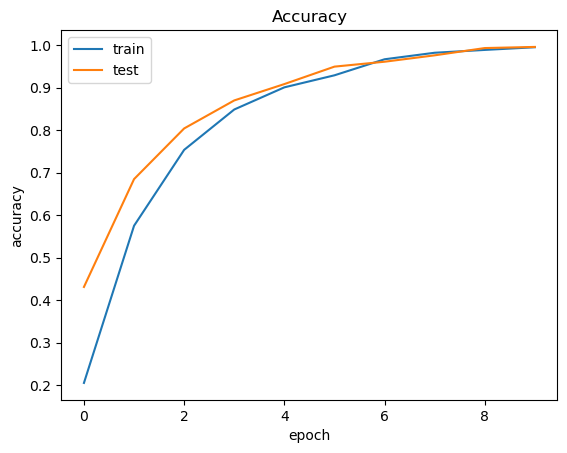

In [22]:
#view our traning history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [23]:
#Reshape our test data so that we can evaluate it's performance on unseen data
from sklearn.preprocessing import LabelBinarizer

test_labels = test['label']
test.drop('label',axis=1,inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
label_binrizer = LabelBinarizer()

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0],28,28,1)

test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 3s 11ms/step


In [24]:
#Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels,y_pred.round())

0.7962911321807027

In [25]:
def getLetter(result):
    classLabels ={0:'A',
                 1:'B',
                 2:'C',
                 3:'D',
                 4:'E',
                 5:'F',
                 6:'G',
                 7:'H',
                 8:'I',
                 9:'K',
                 10:'L',
                 11:'M',
                 12:'N',
                 13:'O',
                 14:'P',
                 15:'Q',
                 16:'R',
                 17:'S',
                 18:'T',
                 19:'U',
                 20:'V',
                 21:'W',
                 22:'X',
                 23:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Test on Actual Webcam Input

In [26]:
import cv2

# Create a VideoCapture object to access the camera (0 for default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open the camera.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Could not read a frame.")
        break

        # define region of interest
    roi = frame[100:400, 320:620]
    # Convert ROI to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    roi = roi.reshape(1, 28, 28, 1)

    result = str(model.predict_classes(roi, 1, verbose=0)[0])
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: 'Sequential' object has no attribute 'predict_classes'